In [1]:
from crismy.crismy import CRISM
from crismy.utils import utils
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from ipywidgets import *
%matplotlib inline
import cv2
cv2.__version__

'4.1.0'

In [2]:
f = '/Users/andrew/Dropbox/Planetary/CRISM_Project/crism_data/hsp00017ba0_01_if218l_trr3.img'
hsp = CRISM.open(f)

In [3]:
hsp.bands, hsp.lines, hsp.samples

(154, 2700, 64)

In [4]:
hsp.rownum_table

array([  0,   3,  17,  28,  46,  57,  66,  72,  82,  93, 104, 123, 142,
       157, 176, 187, 196, 198, 199, 202, 205, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 287, 290, 292, 293, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 312, 318, 322, 327, 331, 334,
       337, 340, 345, 350, 360, 368, 369, 370, 371, 372, 373, 374, 375,
       376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388,
       389, 395, 403, 405, 406, 407, 413, 422, 433, 438, 442], dtype=int16)

In [7]:
plt.rcParams['figure.figsize'] = 10, 10
utils.plot_widget_Gray(hsp, 10)

interactive(children=(IntSlider(value=10, continuous_update=False, description='R', max=154), Output()), _dom_…

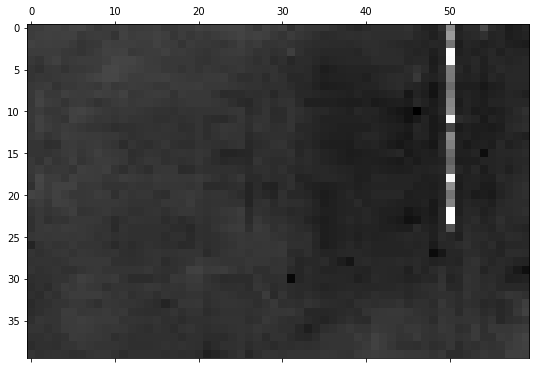

In [76]:
d = hsp.data[120, 0:40, 3:-1]
plt.matshow(d,cmap='gray')

In [77]:
help(cv2.boxFilter)

Help on built-in function boxFilter:

boxFilter(...)
    boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) -> dst
    .   @brief Blurs an image using the box filter.
    .   
    .   The function smooths an image using the kernel:
    .   
    .   \f[\texttt{K} =  \alpha \begin{bmatrix} 1 & 1 & 1 &  \cdots & 1 & 1  \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ \hdotsfor{6} \\ 1 & 1 & 1 &  \cdots & 1 & 1 \end{bmatrix}\f]
    .   
    .   where
    .   
    .   \f[\alpha = \fork{\frac{1}{\texttt{ksize.width*ksize.height}}}{when \texttt{normalize=true}}{1}{otherwise}\f]
    .   
    .   Unnormalized box filter is useful for computing various integral characteristics over each pixel
    .   neighborhood, such as covariance matrices of image derivatives (used in dense optical flow
    .   algorithms, and so on). If you need to compute pixel sums over variable-size windows, use #integral.
    .   
    .   @param src input image.
    .   @param dst output image of the same size a

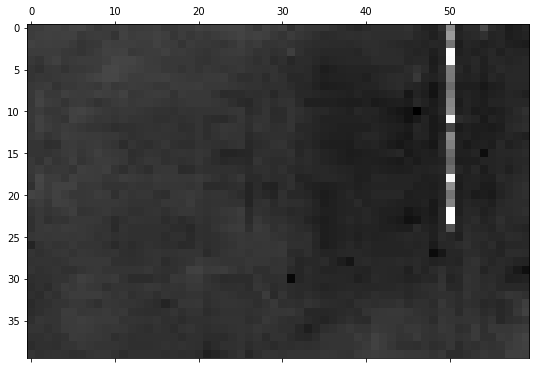

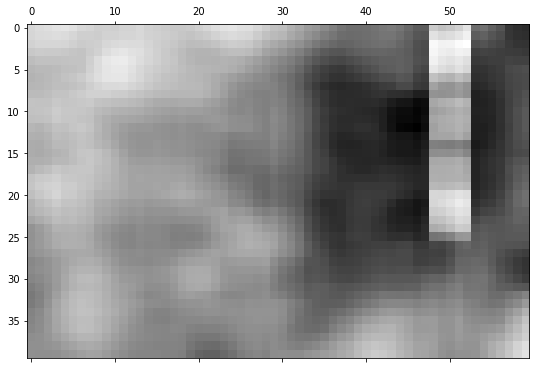

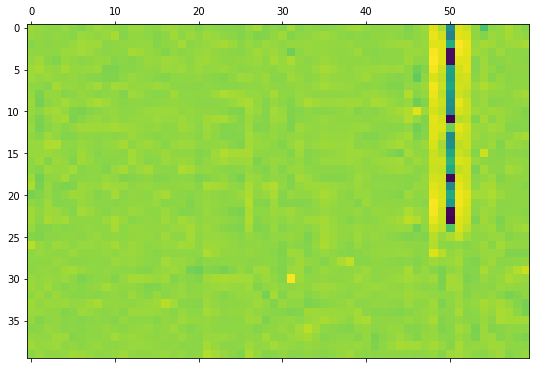

In [78]:
plt.rcParams['figure.figsize'] =6, 6
plt.matshow(d,cmap='gray')
dd = cv2.boxFilter(d, -1, (5,5), normalize=True, borderType=1)
plt.matshow(dd,cmap='gray')
plt.matshow(dd-d)

(array([2.500e+01, 1.444e+03, 9.070e+02, 2.000e+00, 8.000e+00, 7.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 6.000e+00]),
 array([0.12921028, 0.15302153, 0.17683277, 0.20064402, 0.22445527,
        0.24826652, 0.27207777, 0.295889  , 0.31970024, 0.3435115 ,
        0.36732274], dtype=float32),
 <a list of 10 Patch objects>)

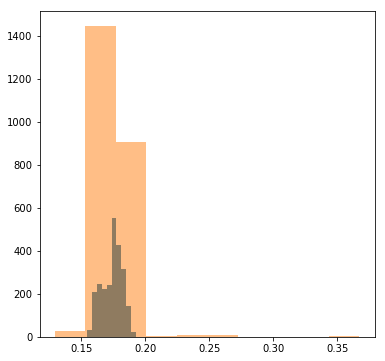

In [79]:
plt.hist(dd.flatten());
plt.hist(d.flatten(), alpha=0.5)

In [80]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

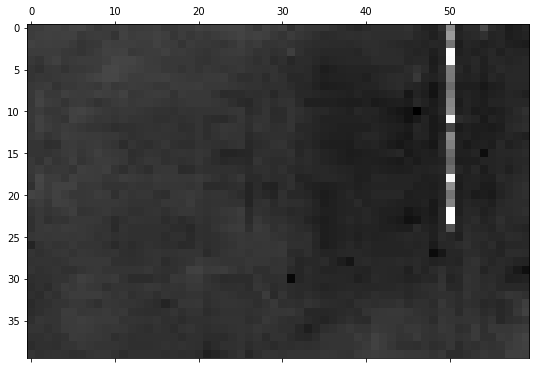

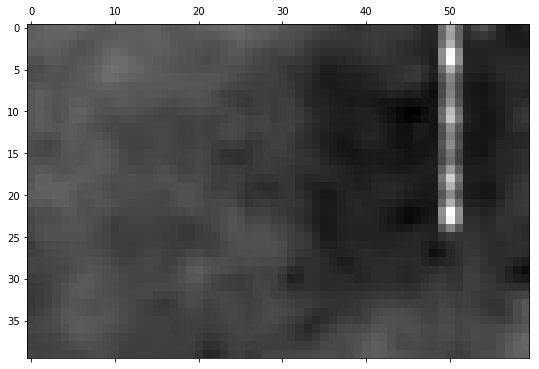

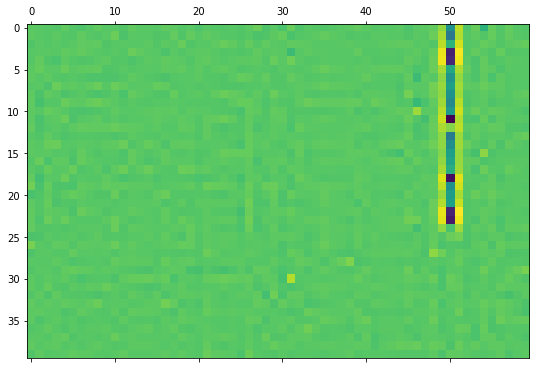

In [81]:
plt.rcParams['figure.figsize'] =6, 6
plt.matshow(d,cmap='gray')
dd = cv2.GaussianBlur(d, (3,3), 0,4, borderType=1)
plt.matshow(dd,cmap='gray')
plt.matshow(dd-d)

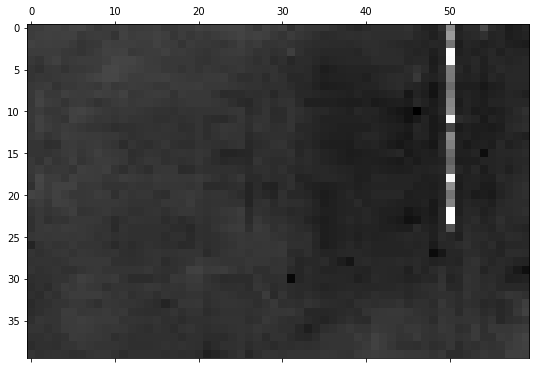

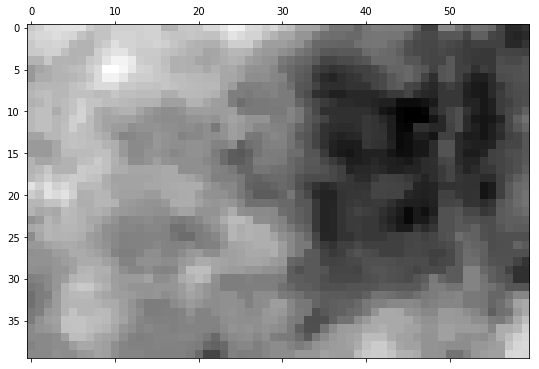

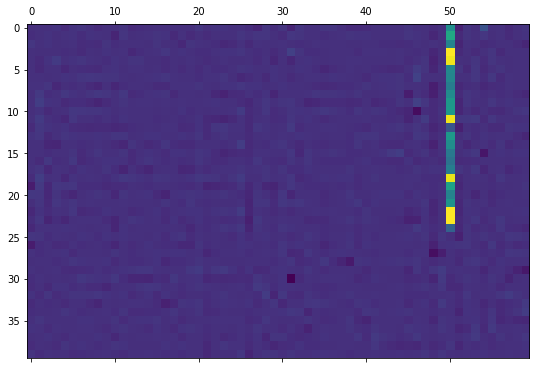

In [86]:
plt.rcParams['figure.figsize'] =6, 6
plt.matshow(d,cmap='gray')
dd = cv2.medianBlur(d, 3)
plt.matshow(dd,cmap='gray')
plt.matshow(d-dd)

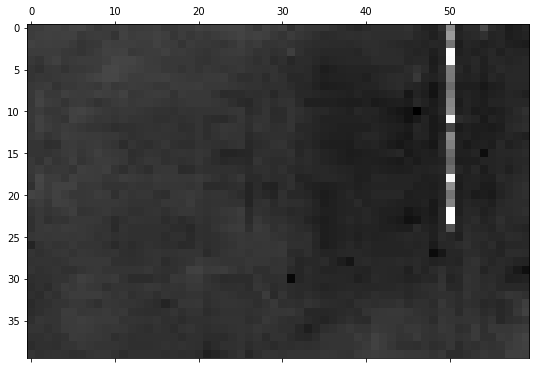

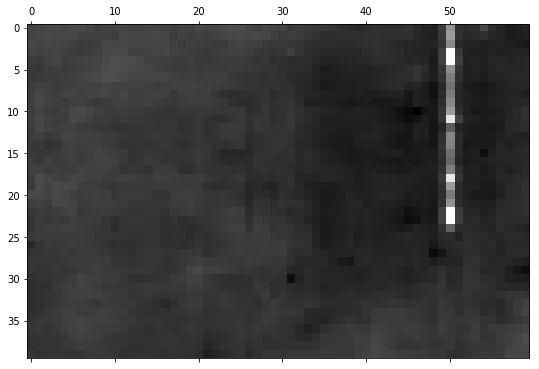

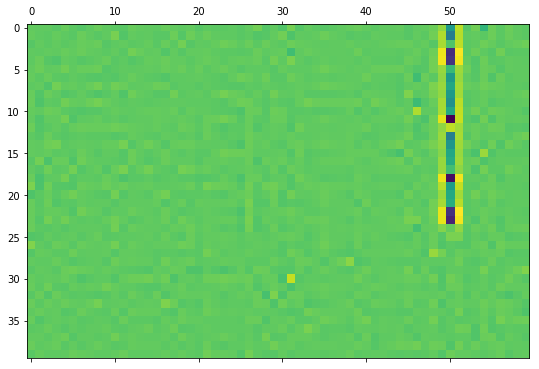

In [83]:
plt.rcParams['figure.figsize'] =6, 6
plt.matshow(d,cmap='gray')
dd = cv2.bilateralFilter(d, 9, .5, ., borderType=cv2.BORDER_REFLECT)
plt.matshow(dd,cmap='gray')
plt.matshow(dd-d)